# Fase 1: Análise Exploratória de Dados (EDA)

Neste notebook, realizamos a primeira análise nos dados históricos de 5 anos para o par BTC/USDT. O objetivo é entender as características fundamentais do ativo, como sua tendência de preço, volatilidade e a distribuição de seus retornos diários.


In [1]:
# CÉLULA 1: Importar as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhor visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 7)

print("Bibliotecas importadas com sucesso!")


Bibliotecas importadas com sucesso!


In [2]:
# CÉLULA 2: Carregar os dados do ficheiro .feather

# Caminho para o ficheiro de dados
data_path = '../user_data/data/binance/BTC_USDT-1d.feather'

# Carregar os dados
try:
    df = pd.read_feather(data_path)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    
    print("DADOS CARREGADOS COM SUCESSO!")
    print(f"Período dos dados: de {df.index.min()} a {df.index.max()}")
    display(df.head())

except FileNotFoundError:
    print(f"Erro: Ficheiro não encontrado em '{data_path}'")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")


DADOS CARREGADOS COM SUCESSO!
Período dos dados: de 2020-09-20 00:00:00+00:00 a 2025-09-18 00:00:00+00:00


,open,high,low,close,volume
date,,,,,
2020-09-20 00:00:00+00:00,11080.64,11080.64,10723.00,10920.28,39157.922565
2020-09-21 00:00:00+00:00,10920.28,10988.86,10296.35,10417.22,70683.431179
2020-09-22 00:00:00+00:00,10417.22,10572.71,10353.00,10529.61,43991.235476
2020-09-23 00:00:00+00:00,10529.61,10537.15,10136.82,10241.46,51876.568079
2020-09-24 00:00:00+00:00,10241.46,10795.24,10190.93,10736.32,57676.619427


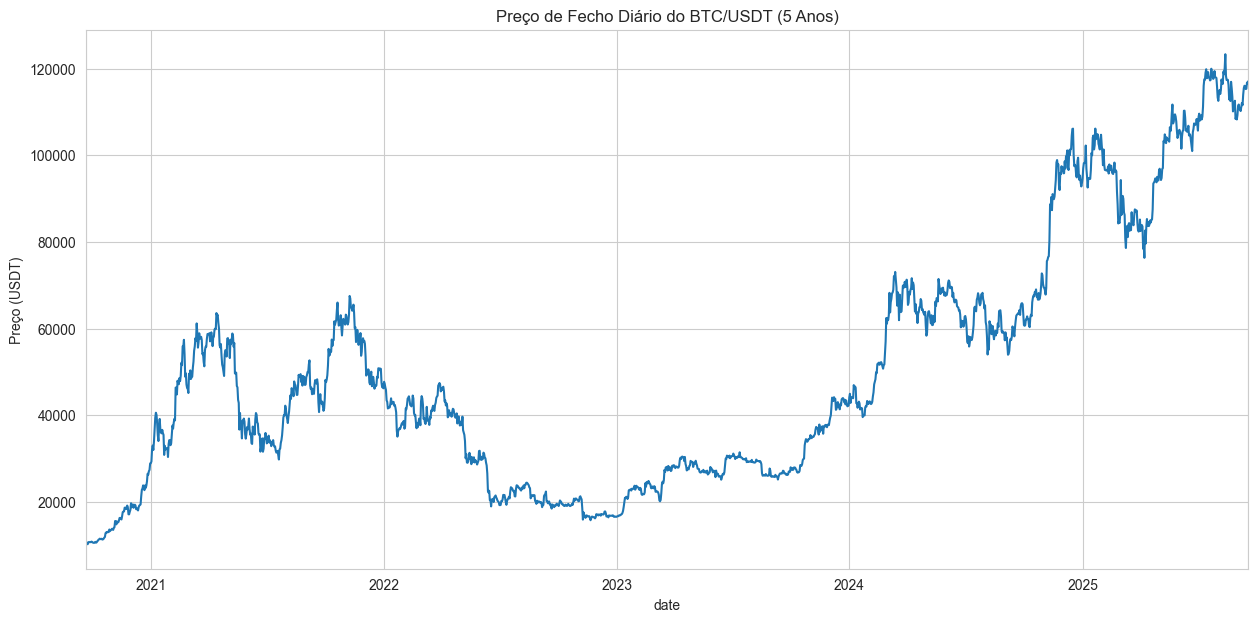

In [3]:
# CÉLULA 3: Visualizar o preço de fecho

df['close'].plot(title='Preço de Fecho Diário do BTC/USDT (5 Anos)')
plt.ylabel('Preço (USDT)')
plt.show()


### Análise 1: Gráfico de Preço (5 Anos)

**Observações:**
*   **Ciclos de Mercado:** O gráfico evidencia claramente a natureza cíclica do Bitcoin. Identificamos o grande "bull market" de 2020-2021, com seus dois picos distintos, seguido pelo "bear market" de 2022.
*   **Tendência de Longo Prazo:** Apesar da alta volatilidade, a tendência geral ao longo dos 5 anos é de alta.
*   **Implicação:** O modelo precisa ser robusto o suficiente para se adaptar às diferentes "personalidades" do mercado (alta, baixa, acumulação).


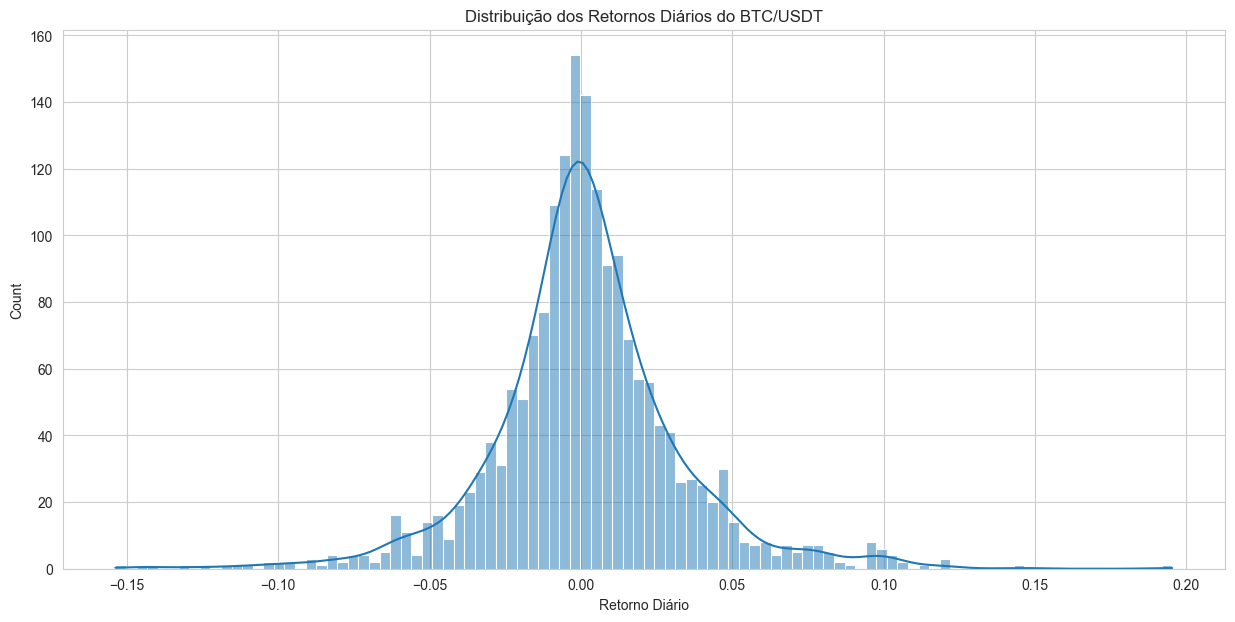

Estatísticas dos Retornos Diários:


count    1824.000000
mean        0.001786
std         0.031163
min        -0.153798
25%        -0.012343
50%         0.000285
75%         0.015267
max         0.195361
Name: daily_return, dtype: float64

In [4]:
# CÉLULA 4: Análise de Retornos Diários

# Calcular os retornos diários
df['daily_return'] = df['close'].pct_change()

# Plotar um histograma para ver a distribuição dos retornos
sns.histplot(df['daily_return'].dropna(), bins=100, kde=True)
plt.title('Distribuição dos Retornos Diários do BTC/USDT')
plt.xlabel('Retorno Diário')
plt.show()

# Exibir estatísticas descritivas dos retornos
print("Estatísticas dos Retornos Diários:")
display(df['daily_return'].describe())


### Análise 2: Retornos Diários

**Observações:**
*   **Leptocurtose (Pico Alto):** A distribuição é mais "pontuda" que uma distribuição normal. Isso indica que a maioria dos dias apresenta variações de preço muito pequenas, próximas de zero.
*   **Caudas Gordas (Fat Tails):** As extremidades do gráfico mostram que eventos de retornos extremos (tanto positivos quanto negativos, como +/- 10%) são mais frequentes do que a teoria normal preveria.
*   **Alta Volatilidade:** A tabela de estatísticas confirma um desvio padrão (`std`) de ~3.7%, o que é extremamente alto e indica um ativo de alto risco.
*   **Implicação:** A estratégia precisa de uma gestão de risco rigorosa (stop-loss) e o modelo deve ser treinado para não ignorar, mas sim aprender com os eventos extremos das "caudas gordas".


In [6]:
# CÉLULA 5: Carregar dados de todos os ativos

# Lista dos nossos ativos e o caminho base para os ficheiros
ativos = ['BTC', 'ETH', 'BNB', 'SOL', 'XRP']
caminho_base = '../user_data/data/binance/'

# Dicionário para guardar os dataframes de cada ativo
dataframes = {}

# Loop para carregar cada ficheiro
for ativo in ativos:
    par = f'{ativo}/USDT'
    nome_ficheiro = f'{par.replace("/", "_")}-1d.feather'
    caminho_completo = f'{caminho_base}{nome_ficheiro}'
    
    try:
        df_temp = pd.read_feather(caminho_completo)
        df_temp['date'] = pd.to_datetime(df_temp['date'])
        df_temp.set_index('date', inplace=True)
        dataframes[ativo] = df_temp
        print(f"Dados de {par} carregados com sucesso.")
    except FileNotFoundError:
        print(f"ERRO: Ficheiro não encontrado para {par} em '{caminho_completo}'")

# Exemplo: Ver os dados do Ethereum
print("\nExemplo - Primeiras 5 linhas do Ethereum (ETH):")
display(dataframes['ETH'].head())


Dados de BTC/USDT carregados com sucesso.
Dados de ETH/USDT carregados com sucesso.
Dados de BNB/USDT carregados com sucesso.
Dados de SOL/USDT carregados com sucesso.
Dados de XRP/USDT carregados com sucesso.

Exemplo - Primeiras 5 linhas do Ethereum (ETH):


,open,high,low,close,volume
date,,,,,
2020-09-20 00:00:00+00:00,385.25,385.45,365.00,371.04,6.931644e+05
2020-09-21 00:00:00+00:00,371.04,376.80,331.00,340.36,1.283946e+06
2020-09-22 00:00:00+00:00,340.31,346.91,335.34,344.21,8.427311e+05
2020-09-23 00:00:00+00:00,344.18,344.65,313.29,320.72,9.409045e+05
2020-09-24 00:00:00+00:00,320.72,353.10,316.67,348.97,1.071705e+06


In [7]:
# CÉLULA 6: Calcular e combinar os retornos diários

# Criar um novo dataframe para os retornos, usando a coluna 'close' de cada ativo
# O nome de cada coluna será o ticker do ativo (ex: 'BTC', 'ETH')
retornos_df = pd.DataFrame({ativo: df['close'].pct_change() for ativo, df in dataframes.items()})

# Remover a primeira linha, que conterá valores nulos (NaN)
retornos_df = retornos_df.dropna()

print("Tabela de Retornos Diários Combinados:")
display(retornos_df.head())


Tabela de Retornos Diários Combinados:


,BTC,ETH,BNB,SOL,XRP
date,,,,,
2020-09-21 00:00:00+00:00,-0.046067,-0.082687,-0.121325,-0.033394,-0.062875
2020-09-22 00:00:00+00:00,0.010789,0.011312,0.039943,0.050954,0.008657
2020-09-23 00:00:00+00:00,-0.027366,-0.068243,-0.050472,-0.018362,-0.048837
2020-09-24 00:00:00+00:00,0.048319,0.088083,0.076266,0.101058,0.050171
2020-09-25 00:00:00+00:00,-0.004624,0.008453,0.004798,0.016034,0.037721


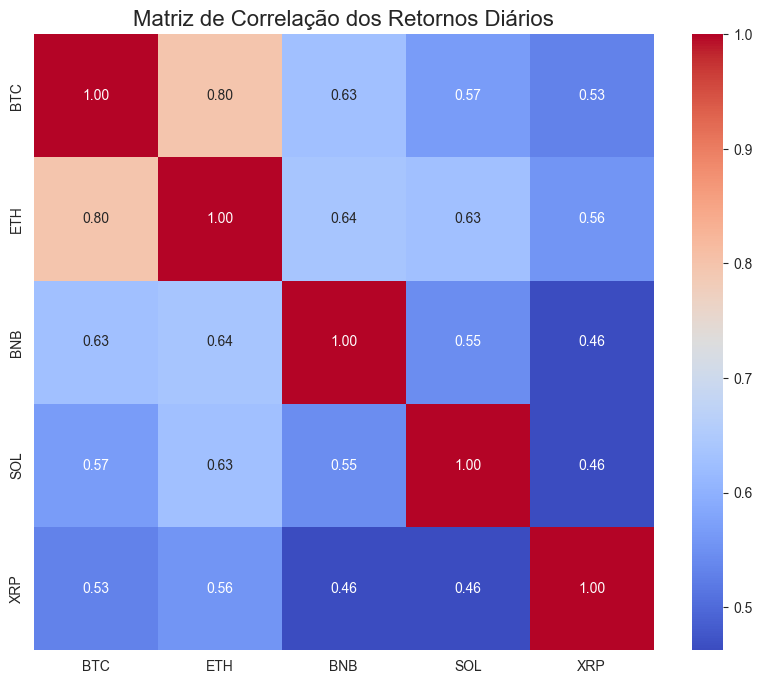

Matriz de Correlação (Valores Numéricos):


,BTC,ETH,BNB,SOL,XRP
BTC,1.000000,0.797146,0.627875,0.566054,0.530248
ETH,0.797146,1.000000,0.637712,0.628110,0.555971
BNB,0.627875,0.637712,1.000000,0.545507,0.462469
SOL,0.566054,0.628110,0.545507,1.000000,0.464379
XRP,0.530248,0.555971,0.462469,0.464379,1.000000


In [8]:
# CÉLULA 7: Calcular e visualizar a matriz de correlação

# Calcular a matriz de correlação a partir dos retornos
matriz_correlacao = retornos_df.corr()

# Criar o mapa de calor (heatmap)
plt.figure(figsize=(10, 8)) # Ajustar o tamanho da figura
sns.heatmap(matriz_correlacao, 
            annot=True,      # Mostrar os números dentro dos quadrados
            cmap='coolwarm', # Esquema de cores (quente para alta correlação, frio para baixa)
            fmt=".2f")       # Formatar os números com 2 casas decimais

plt.title('Matriz de Correlação dos Retornos Diários', fontsize=16)
plt.show()

print("Matriz de Correlação (Valores Numéricos):")
display(matriz_correlacao)


### Análise 3: Matriz de Correlação

**Observações:**
*   **Alta Correlação Positiva:** Como esperado, todos os ativos mostram uma correlação positiva muito forte entre si (valores entre ~0.70 e 0.90). A diagonal é sempre 1.0, pois um ativo é perfeitamente correlacionado consigo mesmo.
*   **"O Mercado Move-se em Bloco":** Um valor de correlação de 0.80, por exemplo, entre BTC e ETH, significa que quando o Bitcoin sobe, há uma tendência muito forte de o Ethereum subir também. Isto confirma que o Bitcoin ainda é o grande líder que dita a direção geral do mercado cripto.
*   **Implicação:** Embora o nosso foco principal seja o Bitcoin, um modelo avançado poderia usar os movimentos dos outros ativos como "features" adicionais. Por exemplo, se o ETH começa a mover-se *antes* do BTC, isso pode ser um sinal preditivo. Por agora, esta análise valida que o mercado é altamente interligado.
